In [24]:
%load_ext autoreload
%autoreload 2

import parse_data.preprocess as preprocess
import parse_data.loading as loading
from analysis.response_times import calculate_response_times, plot_response_times
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import globals
import data_strings
import parse_data.identify_filepaths as identify_filepaths
import parse_data.prepare_data as prepare_data
import parse_data.flip_rotate_trajectories as flip_rotate_trajectories
from data_extraction import get_indices
from plotting.plot_octagon import plot_octagon
from plotting.plot_octagon import return_alcove_centre_points
import trajectory_analysis.trajectory_vectors as trajectory_vectors
import trajectory_analysis.trajectory_headangle as trajectory_headangle
import math
import plotting.plot_trajectory as plot_trajectory

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
# Load JSON file into pandas df with collapsed data dictionary and adjustments based on date of recording 
data_folder = data_strings.DATA_FOLDER
json_filenames_social, json_filenames_solo = identify_filepaths.get_filenames(data_folder=data_folder)

In [8]:
json_filenames_social[:-2]

['240913_1/2024-09-13_11-31-00_YW13_JL13_Social.json',
 '240927_1/2024-09-27_14-25-20_SH27_EN27_Social.json',
 '241017_1/2024-10-17_14-28-40_SP17_AW17_Social.json',
 '241017_2/2024-10-17_16-41-38_ZH17_EM17_Social.json',
 '241112_1/2024-11-12_13-31-14_KA12_WM12_Social.json',
 '241112_2/2024-11-12_15-23-24_FA12_SL12_Social.json',
 '241113_1/2024-11-13_14-18-54_NK13_RD13_Social.json',
 '241113_2/2024-11-13_15-28-07_YL13_HC13_Social.json',
 '241119_1/2024-11-19_14-24-49_AV19_XG19_Social.json',
 '241119_2/2024-11-19_15-22-56_SB19_HH19_Social.json',
 '241120_1/2024-11-20_14-17-44_JS20_RR20_Social.json',
 '241120_2/2024-11-20_15-16-21_ZS20_VC20_Social.json',
 '241203_1/2024-12-03_14-31-51_PO03_NN03_Social.json',
 '241203_2/2024-12-03_15-27-28_EX03_BC03_Social.json',
 '241210_1/2024-12-10_14-21-17_TE10_TK10_Social.json',
 '241210_2/2024-12-10_15-20-11_RK10_RU10_Social.json',
 '241219_1/2024-12-19_15-28-24_JU19_SY19_Social.json',
 '241220_1/2024-12-20_17-44-50_KS20_CS20_Social.json',
 '250115_1

In [7]:
# Pre-process data
df, trial_lists_social = prepare_data.prepare_data(data_folder, json_filenames_social[:-2], combine=False)

IntProgress(value=0, max=50)

filepath: /mnt/tom/ceph/ogma/human_octagon/RAW/standard/240913_1/2024-09-13_11-31-00_YW13_JL13_Social.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: /mnt/tom/ceph/ogma/human_octagon/RAW/standard/240927_1/2024-09-27_14-25-20_SH27_EN27_Social.json
Data is from period before 2024-09-13 00:00:00
Running dataframe through playerinfo_playerposition_conversion.
Loading complete.
Preprocessing complete.
filepath: /mnt/tom/ceph/ogma/human_octagon/RAW/standard/240927_1/2024-09-27_14-25-20_SH27_EN27_Social.json
Loading complete.
Preprocessing complete.
filepath: /mnt/tom/ceph/ogma/human_octagon/RAW/standard/241017_1/2024-10-17_14-28-40_SP17_AW17_Social.json
Loading complete.
Preprocessing complete.
filepath: /mnt/tom/ceph/ogma/human_octagon/RAW/standard/241017_1/2024-10-17_14-28-40_SP17_AW17_Social.json
Loading complete.
Preprocessing complete.
filepath: /mnt/tom/ceph/ogma/huma

In [30]:
len(trial_lists_social)

50

In [31]:
test_list = sum(trial_lists_social[:], [])

high_low_indices = get_indices.get_trials_trialtype(test_list, trial_type=globals.HIGH_LOW)
test_list = [test_list[i] for i in high_low_indices]

test_trial = test_list[30]
trigger_event = test_trial[test_trial['eventDescription'] == globals.SELECTED_TRIGGER_ACTIVATION]
trigger_event

,timeLocal,timeApplication,eventDescription,data.playerPosition.0.clientId,data.playerPosition.0.location.x,data.playerPosition.0.location.y,data.playerPosition.0.location.z,data.playerPosition.0.rotation.x,data.playerPosition.0.rotation.y,data.playerPosition.0.rotation.z,data.playerPosition.1.clientId,data.playerPosition.1.location.x,data.playerPosition.1.location.y,data.playerPosition.1.location.z,data.playerPosition.1.rotation.x,data.playerPosition.1.rotation.y,data.playerPosition.1.rotation.z,data.trialNum,data.trialType,data.wall1,data.wall2,data.wallTriggered,data.triggerClient,data.playerScores.0,data.playerScores.1,timeReferenced,trial_epoch
21340,1900-01-01 11:38:21.645,0 days 00:08:17.577000,server-selected trigger activation,0.0,-3.306398869,1.984999895,-11.731362343,356.65032959,210.623153687,-0.000000053,1.0,12.679022789,1.984999537,12.193871498,356.65032959,41.460041046,-0.000000053,37.0,HighLow,2.0,6.0,2.0,1.0,NaN,NaN,0 days 00:07:21.478000,post choice


In [32]:
# %load_ext autoreload
# %autoreload 2

# import plotting.plot_trajectory as plot_trajectory
# fig, ax = plt.subplots(figsize=(10, 10))
# ax = plot_trajectory.plot_session_trajectories_high_low(ax, test_list)

In [33]:
test_list_central = []
winners = get_indices.get_trigger_activators(test_list)
for i, trial in enumerate(test_list):
    if winners[i] == 0:
        if -4 < trial['data.playerPosition.0.location.x'].values[0] < 4 and -4 < trial['data.playerPosition.0.location.z'].values[0] < 4:
            test_list_central.append(trial)
    elif winners[i] == 1:
        if -4 < trial['data.playerPosition.1.location.x'].values[0] < 4 and -4 < trial['data.playerPosition.1.location.z'].values[0] < 4:
            test_list_central.append(trial)



test_list_central_2 = []
winners = get_indices.get_trigger_activators(test_list)
for i, trial in enumerate(test_list):
    x,y =   get_indices.get_player_slice_onset_loc(trial, player_id=winners[i])
    if -4 < x < 4 and -4 < y < 4:
        test_list_central_2.append(trial)

print(f"Total number of trials in test_list: {len(test_list)}")
print(f"Number of central trials in test_list_central: {len(test_list_central)}")
print(f"Number of central trials in test_list_central_2: {len(test_list_central_2)}")

test_list_central = test_list_central_2

Total number of trials in test_list: 5342
Number of central trials in test_list_central: 1719
Number of central trials in test_list_central_2: 1799


In [34]:
trial_indices = get_indices.get_trials_with_wall_sep(test_list_central, wall_sep=1)
test_list_filtered_45 = [test_list_central[i] for i in trial_indices]
trial_indices = get_indices.get_trials_with_wall_sep(test_list_central, wall_sep=2)
test_list_filtered_90 = [test_list_central[i] for i in trial_indices]
trial_indices = get_indices.get_trials_with_wall_sep(test_list_central, wall_sep=4)
test_list_filtered_180 = [test_list_central[i] for i in trial_indices]



In [35]:
def flip_rotate_trial_headangles(trial, theta, flip=True):
    '''Rotate yaw by theta
       Flip yaw if wall 1 CCW of wall 0
       Return altered yaw array of length 2 (1 array of altered yaws for each player)'''

    num_walls = globals.NUM_WALLS

    altered_yaw_values = []
    num_players = preprocess.num_players(trial)

    for player_id in range(num_players):
        
        y_rotation = trial[globals.PLAYER_ROT_DICT[player_id]['yrot']]
        head_angles = np.deg2rad(y_rotation)
        
        player_altered_yaw = []
        for yaw in head_angles:
                new_yaw = (yaw - theta) % (2 * math.pi) #keeps new yaw within valid 0-2pi range
                #note: changed from yaw + theta to above, appears to work but run checks

                    #flip if needed
                if flip:
                    walls = get_indices.get_walls(trial=trial, trial_list=None, trial_index=None, num_walls=2)

                    if walls[1] < walls[0]:
                        counterclockwise_distance = walls[0] - walls[1]
                    else:
                        counterclockwise_distance = (num_walls - walls[1]) + walls[0] 
                    clockwise_distance = num_walls - counterclockwise_distance

                    if counterclockwise_distance < clockwise_distance:
                        new_yaw = flip_headangles(new_yaw)

                player_altered_yaw.append(new_yaw)
            
        altered_yaw_values.append(np.rad2deg(player_altered_yaw))
        
    return altered_yaw_values 

def flip_headangles(altered_yaw):
    ''' If wall 0 is CW of wall 1, flip the yaw around. This keeps wall 0
        CCW of wall 1 '''
    
    altered_yaw = (-altered_yaw) % (2 * math.pi)  # Ensure the angle is within the range [0, 2π)

    return altered_yaw

def replace_both_players_with_altered_yaws(trial, altered_yaw_values):
    '''Replaces all y rotation values
    with altered yaw values from flip-rotate function
    Input: altered_yaw_values being an array of two arrays, one for each player'''
    
        
    num_players = preprocess.num_players(trial)
    
    trial_copy = trial.copy()

    for player_id in range(num_players):
        
        trial_copy[globals.PLAYER_ROT_DICT[player_id]['yrot']] = altered_yaw_values[player_id]

    return trial_copy

#umbrella function
def process_and_update_trials_both_players(trial):
    '''Changes yaw values and coordinates for given player in each trial in trial list 
    Returns new trial list with updated trials'''    
    
    #step 1: calculate rotation angle
    #theta = flip_rotate_trajectories.find_rotation_angle_trial(trial_list=trial_list, trial_index=i)
    theta = flip_rotate_trajectories.find_rotation_angle_trial(trial=trial)

    #step 2: change yaw values 
    altered_yaw_values = flip_rotate_trial_headangles(trial=trial, theta=theta)

    #step 3: create trial copy with new yaw values
    trial_copy = replace_both_players_with_altered_yaws(trial, altered_yaw_values=altered_yaw_values)


    #add the updated trial to the new trial list
    trial_updated = trial_copy

    return trial_updated

In [36]:
test_trial_list_fr_45, test_trial_list_fr_90, test_trial_list_fr_180 = [], [], []

for i in range(len(test_list_filtered_45)):
    trial_fr_trajectory = flip_rotate_trajectories.flip_rotate_trajectories(trial_list=test_list_filtered_45, trial_index=i)
    trial_fr_trajectory_fr_headangles = process_and_update_trials_both_players(trial_fr_trajectory)
    test_trial_list_fr_45.append(trial_fr_trajectory_fr_headangles)

test_trial_list_fr_90 = []
for i in range(len(test_list_filtered_90)):
    trial_fr_trajectory = flip_rotate_trajectories.flip_rotate_trajectories(trial_list=test_list_filtered_90, trial_index=i)
    trial_fr_trajectory_fr_headangles = process_and_update_trials_both_players(trial_fr_trajectory)
    test_trial_list_fr_90.append(trial_fr_trajectory_fr_headangles)

test_trial_list_fr_180 = []
for i in range(len(test_list_filtered_180)):
    trial_fr_trajectory = flip_rotate_trajectories.flip_rotate_trajectories(trial_list=test_list_filtered_180, trial_index=i)
    trial_fr_trajectory_fr_headangles = process_and_update_trials_both_players(trial_fr_trajectory)
    test_trial_list_fr_180.append(trial_fr_trajectory_fr_headangles)

test_trial_lists_fr = [test_trial_list_fr_45, test_trial_list_fr_90, test_trial_list_fr_180]


In [40]:

# Define bin edges: 8 bins, each 45 degrees wide, centered at 0, 45, ..., 315
bin_edges = np.linspace(-np.pi/8, 2*np.pi - np.pi/8, 9)



## 45
# Compute initial head angles for each trial
winning_players_45 = get_indices.get_trigger_activators(test_trial_list_fr_45)
initial_head_angles_45 = []
for i, trial in enumerate(test_trial_list_fr_45):
    head_angles = trajectory_vectors.extract_trial_player_headangles(trial=trial, player_id=winning_players_45[i]).values
    initial_head_angles_45.append(head_angles[0])


# Debug the angle range and binning issues
print(f"Angle range: {np.min(initial_head_angles_45):.3f} to {np.max(initial_head_angles_45):.3f}")
print(f"Bin edges: {bin_edges}")
print(f"Number of angles < first bin edge: {np.sum(np.array(initial_head_angles_45) < bin_edges[0])}")
print(f"Number of angles >= last bin edge: {np.sum(np.array(initial_head_angles_45) >= bin_edges[-1])}")

# Check the distribution of bin_indices before and after wrapping
bin_indices_raw = np.digitize(initial_head_angles_45, bin_edges, right=False) - 1

# Handle negative indices safely for bincount
bin_indices_safe = np.clip(bin_indices_raw, 0, 8)  # Clip to valid range
print("Raw bin indices (clipped):", np.bincount(bin_indices_safe, minlength=9))
print(f"Number of negative indices (angles too low): {np.sum(bin_indices_raw < 0)}")
print(f"Number of indices >= 8 (angles too high): {np.sum(bin_indices_raw >= 8)}")

# Apply wrapping logic
bin_indices_wrapped = []
for b in bin_indices_raw:
    if b < 0:  # Handle negative indices (angles below first bin)
        bin_indices_wrapped.append(0)  # Assign to bin 0
    elif b >= 8:  # Handle indices >= 8 (angles above last bin)
        bin_indices_wrapped.append(0)  # Wrap to bin 0
    else:
        bin_indices_wrapped.append(b)

print("After wrapping:", np.bincount(bin_indices_wrapped, minlength=8))

# Check the actual angles that are getting assigned to each bin
for i in range(8):
    angles_in_bin = [initial_head_angles_45[j] for j, b in enumerate(bin_indices_wrapped) if b == i]
    if len(angles_in_bin) > 0:
        print(f"Bin {i}: {len(angles_in_bin)} trials, angle range: {np.min(angles_in_bin):.3f} to {np.max(angles_in_bin):.3f}")
    else:
        print(f"Bin {i}: 0 trials")

# Assign each trial to a bin
bin_indices = np.digitize(initial_head_angles_45, bin_edges, right=False) - 1
# Wrap around last bin (angles >= 337.5 should go to bin 0)
bin_indices = [b if b < 8 else 0 for b in bin_indices]

# Group trials by bin
binned_trials_45 = [[] for _ in range(8)]
for idx, bin_idx in enumerate(bin_indices):
    binned_trials_45[bin_idx].append(test_trial_list_fr_45[idx])


## 90
# Compute initial head angles for each trial
winning_players_90 = get_indices.get_trigger_activators(test_trial_list_fr_90)
initial_head_angles_90 = []
for i, trial in enumerate(test_trial_list_fr_90):
    head_angles = trajectory_vectors.extract_trial_player_headangles(trial=trial, player_id=winning_players_90[i]).values
    initial_head_angles_90.append(head_angles[0])

# Assign each trial to a bin
bin_indices = np.digitize(initial_head_angles_90, bin_edges, right=False) - 1
# Wrap around last bin (angles >= 337.5 should go to bin 0)
bin_indices = [b if b < 8 else 0 for b in bin_indices]

# Group trials by bin
binned_trials_90 = [[] for _ in range(8)]
for idx, bin_idx in enumerate(bin_indices):
    binned_trials_90[bin_idx].append(test_trial_list_fr_90[idx])


## 180
# Compute initial head angles for each trial
winning_players_180 = get_indices.get_trigger_activators(test_trial_list_fr_180)
initial_head_angles_180 = []
for i, trial in enumerate(test_trial_list_fr_180):
    head_angles = trajectory_vectors.extract_trial_player_headangles(trial=trial, player_id=winning_players_180[i]).values
    initial_head_angles_180.append(head_angles[0])

# Assign each trial to a bin
bin_indices = np.digitize(initial_head_angles_180, bin_edges, right=False) - 1
# Wrap around last bin (angles >= 337.5 should go to bin 0)
bin_indices = [b if b < 8 else 0 for b in bin_indices]

# Group trials by bin
binned_trials_180 = [[] for _ in range(8)]
for idx, bin_idx in enumerate(bin_indices):
    binned_trials_180[bin_idx].append(test_trial_list_fr_180[idx])

Angle range: 0.003 to 6.275
Bin edges: [-0.39269908  0.39269908  1.17809725  1.96349541  2.74889357  3.53429174
  4.3196899   5.10508806  5.89048623]
Number of angles < first bin edge: 0
Number of angles >= last bin edge: 86
Raw bin indices (clipped): [ 71 121 108  71  64  72  96 130  86]
Number of negative indices (angles too low): 0
Number of indices >= 8 (angles too high): 86
After wrapping: [157 121 108  71  64  72  96 130]
Bin 0: 157 trials, angle range: 0.003 to 6.275
Bin 1: 121 trials, angle range: 0.399 to 1.176
Bin 2: 108 trials, angle range: 1.180 to 1.957
Bin 3: 71 trials, angle range: 1.968 to 2.693
Bin 4: 64 trials, angle range: 2.764 to 3.526
Bin 5: 72 trials, angle range: 3.541 to 4.300
Bin 6: 96 trials, angle range: 4.322 to 5.103
Bin 7: 130 trials, angle range: 5.120 to 5.889


In [41]:
num_45_trials = len(get_indices.get_trials_with_wall_sep(test_list, wall_sep=2))
num_45_trials/len(test_list)

0.280980906027705

(array([35., 53., 47., 58., 53., 46., 51., 70.]),
 array([-0.39269908,  0.39269908,  1.17809725,  1.96349541,  2.74889357,
         3.53429174,  4.3196899 ,  5.10508806,  5.89048623]),
 <BarContainer object of 8 artists>)

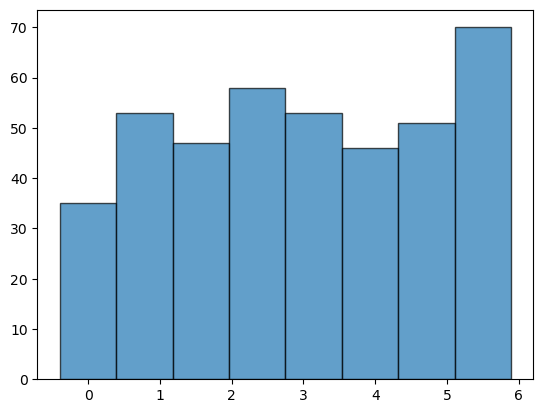

In [42]:
plt.hist(initial_head_angles_180, bins=bin_edges, edgecolor='black', alpha=0.7)

In [43]:
len(binned_trials_180[5])

46

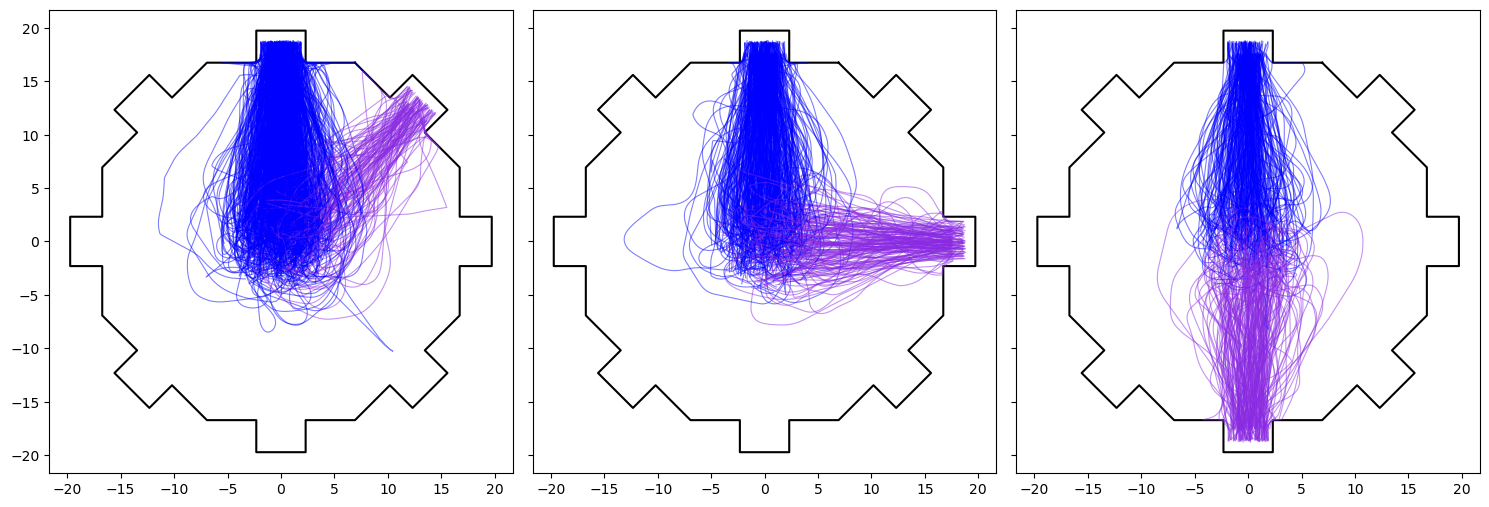

In [44]:
fig, axs = plt.subplots(1,3, figsize=(15, 5), sharex=True, sharey=True)
for i in range(3):
    ax = axs[i]
    test_trial_list_fr = test_trial_lists_fr[i]
    ax = plot_octagon(ax)
    for i in range(len(test_trial_list_fr)):
        ax = plot_trajectory.plot_trial_winning_trajectory(ax, test_trial_list_fr, trial_index=i, wall_specific_colours=True, linewidth=0.8, alpha=0.5)

plt.tight_layout()  

157
121
108
71
64
72
96
130
71
64
72
96
130


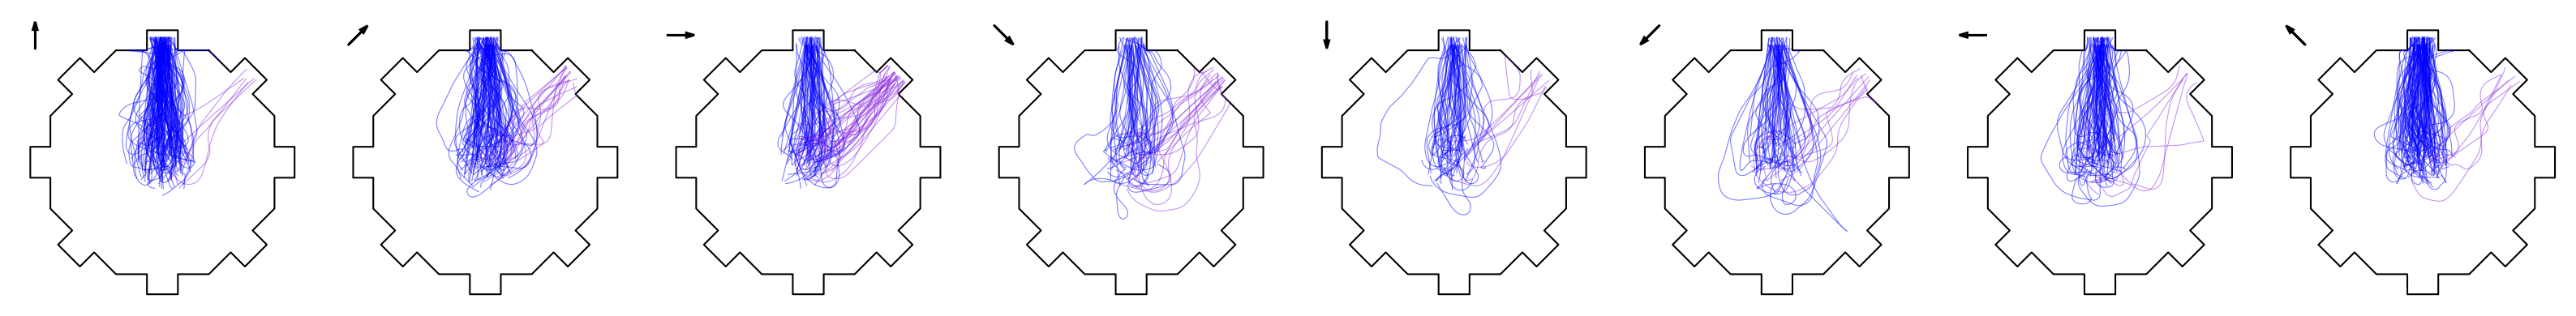

In [45]:
fig, axs = plt.subplots(1, 8, figsize=(32, 4), sharex=True, sharey=True)
for bin_idx in range(8):
    ax = axs[bin_idx]
    ax = plot_octagon(ax)
    print(len(binned_trials_45[bin_idx]))
    for trial in binned_trials_45[bin_idx]:
        ax = plot_trajectory.plot_trial_winning_trajectory(ax, trial=trial, wall_specific_colours=True, linewidth=0.8, alpha=0.5)
    # Remove x and y axes, axis labels, and top/right spines
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()



# Add a directional arrow to each subplot, with the arrow's center fixed
arrow_length = 4
arrow_center_x = -19  # fixed center for all arrows
arrow_center_y = 19

for bin_idx in range(8):
    ax = axs[bin_idx]
    angle = bin_idx * (2 * np.pi / 8)  # 0, 45, ..., 315 degrees in radians
    dx = (arrow_length / 2) * np.sin(angle)
    dy = (arrow_length / 2) * np.cos(angle)
    # Arrow starts at (center - dx, center - dy) and ends at (center + dx, center + dy)
    start_x = arrow_center_x - dx
    start_y = arrow_center_y - dy
    ax.arrow(start_x, start_y, 2*dx, 2*dy, head_width=0.7, head_length=1.2, fc='k', ec='k', linewidth=2, length_includes_head=True)

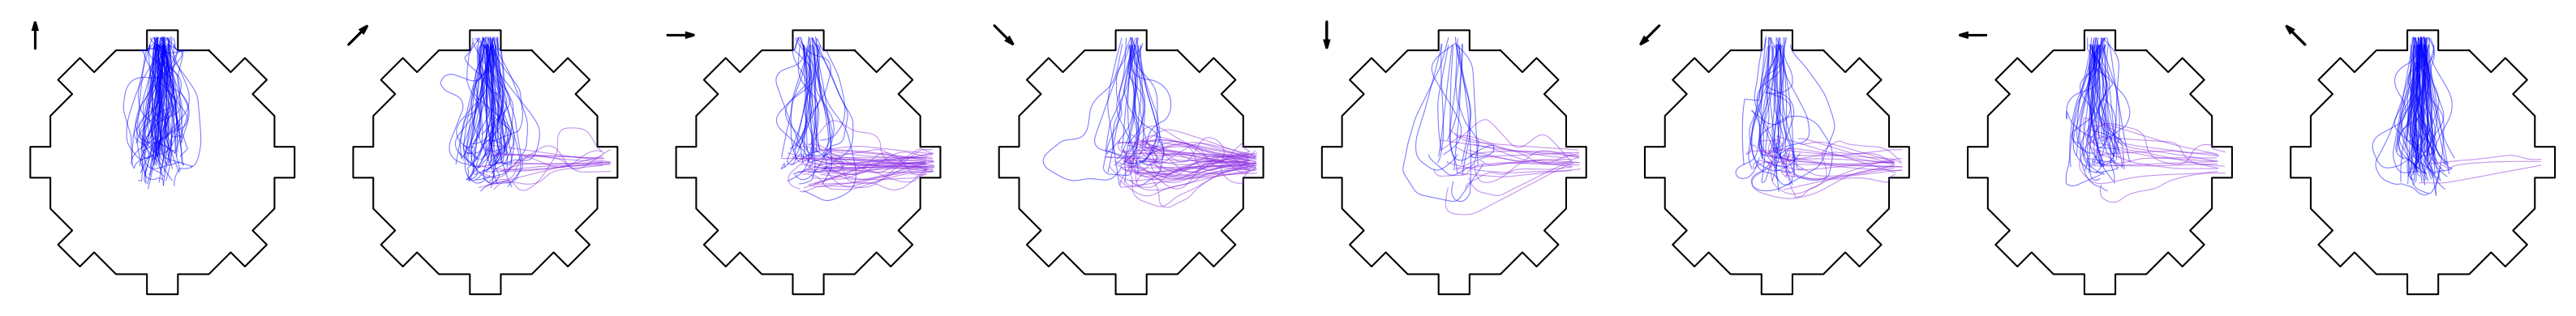

In [46]:
fig, axs = plt.subplots(1, 8, figsize=(32, 4), sharex=True, sharey=True)
for bin_idx in range(8):
    ax = axs[bin_idx]
    ax = plot_octagon(ax)
    for trial in binned_trials_90[bin_idx]:
        ax = plot_trajectory.plot_trial_winning_trajectory(ax, trial=trial, wall_specific_colours=True, linewidth=0.8, alpha=0.5)
    # Remove x and y axes, axis labels, and top/right spines
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
plt.tight_layout()

# Add a directional arrow to each subplot, with the arrow's center fixed
arrow_length = 4
arrow_center_x = -19  # fixed center for all arrows
arrow_center_y = 19

for bin_idx in range(8):
    ax = axs[bin_idx]
    angle = bin_idx * (2 * np.pi / 8)  # 0, 45, ..., 315 degrees in radians
    dx = (arrow_length / 2) * np.sin(angle)
    dy = (arrow_length / 2) * np.cos(angle)
    # Arrow starts at (center - dx, center - dy) and ends at (center + dx, center + dy)
    start_x = arrow_center_x - dx
    start_y = arrow_center_y - dy
    ax.arrow(start_x, start_y, 2*dx, 2*dy, head_width=0.7, head_length=1.2, fc='k', ec='k', linewidth=2, length_includes_head=True)


In [333]:
%matplotlib tk
import matplotlib.animation as animation

fig,ax = plt.subplots()
plt.xticks(np.arange(1,10))
plot, = ax.plot(np.arange(1,10,1),np.arange(1,10,1), linestyle="", marker="d",color='r')

def animate(i):
    plot.set_ydata(np.arange(1,10,1)[i:i+3])
    plot.set_xdata(np.arange(1,10,1)[i:i+3])
    plt.title("Iteration: " + str(i))       

ani = animation.FuncAnimation(fig, animate, interval=100, frames=10)
plt.show()

from IPython.display import HTML
HTML(ani.to_html5_video())

<IPython.core.display.Javascript object>

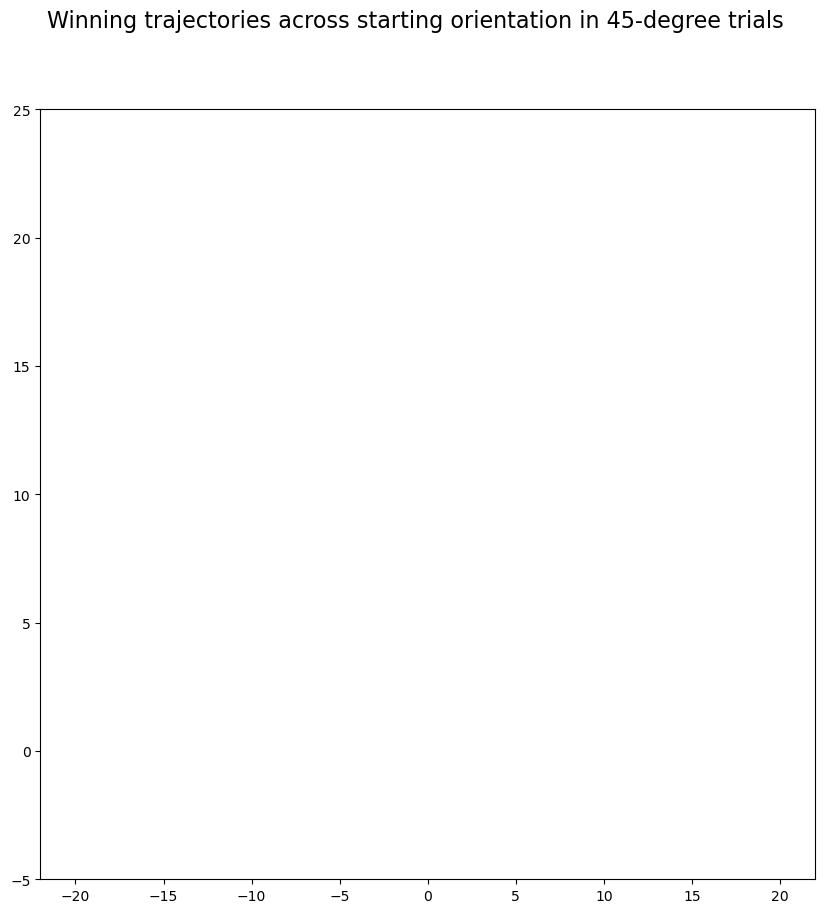

Animation saved as octagon_bin_animation.mp4


In [ ]:
from matplotlib.animation import FFMpegWriter

import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(10,10))

# Fix axis limits to prevent plot from resizing during animation
ax.set_xlim(-22, 22)
ax.set_ylim(-5, 25)

# Add a title to the figure
fig.suptitle("Winning trajectories across starting orientation in 45-degree trials", fontsize=16)

def update(bin_idx):
    ax.clear()
    plot_octagon(ax)  # Do not reassign ax
    for trial in binned_trials_45[bin_idx]:
        plot_trajectory.plot_trial_winning_trajectory(ax, trial=trial, wall_specific_colours=True, linewidth=0.8, alpha=0.5)
    # Remove x and y axes, axis labels, and top/right spines
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # Add a directional arrow closer to the plot center
    arrow_length = 4
    arrow_start_x = -16  # Moved closer to center
    arrow_start_y = 19
    arrow_angle = bin_idx * (2 * np.pi / 8)  # 0, 45, ..., 315 degrees in radians
    dx = arrow_length * np.sin(arrow_angle)
    dy = arrow_length * np.cos(arrow_angle)
    ax.arrow(arrow_start_x, arrow_start_y, dx, dy, head_width=0.7, head_length=1.2, fc='k', ec='k', linewidth=2, length_includes_head=True)
    # Keep axis limits fixed in every frame
    ax.set_xlim(-22, 22)
    ax.set_ylim(-25, 25)

ani = animation.FuncAnimation(fig, update, frames=8, interval=500, repeat=True)
plt.show()

# Save animation as MP4
writer = FFMpegWriter(fps=2, metadata=dict(artist='Me'), bitrate=1800)
ani.save('45_degree_winning_trials.mp4', writer=writer)
print('Animation saved as 45_degree_winning_trials.mp4')

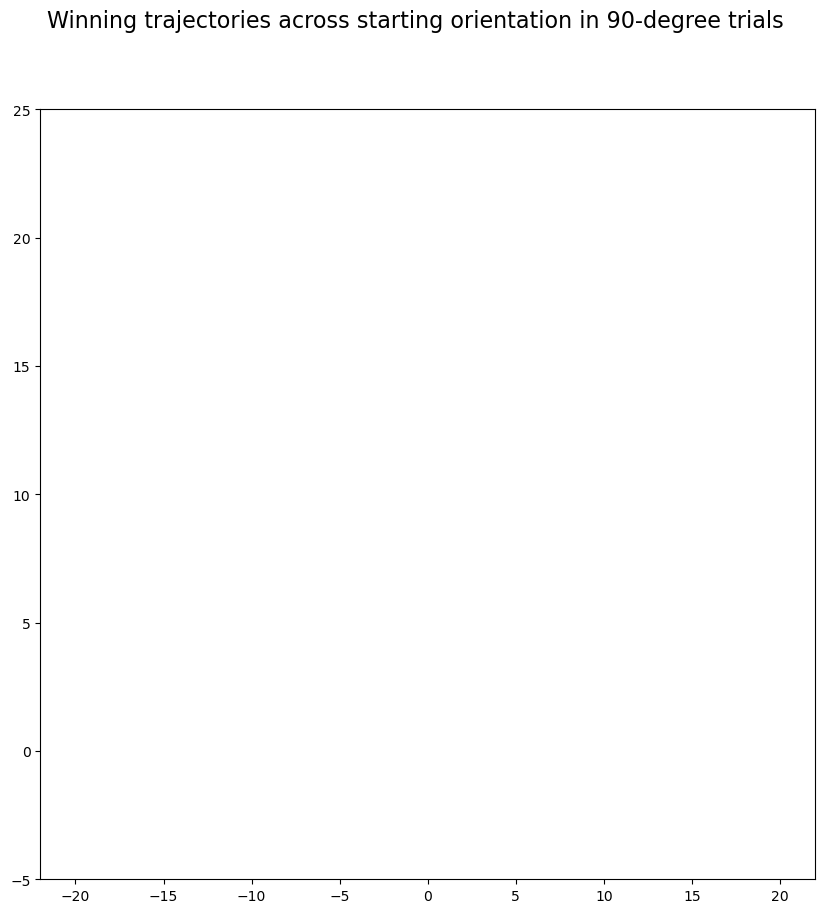

Animation saved as 90_degree_winning_trials.mp4


In [ ]:
from matplotlib.animation import FFMpegWriter

import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(10,10))

# Fix axis limits to prevent plot from resizing during animation
ax.set_xlim(-22, 22)
ax.set_ylim(-5, 25)

# Add a title to the figure
fig.suptitle("Winning trajectories across starting orientation in 90-degree trials", fontsize=16)

def update(bin_idx):
    ax.clear()
    plot_octagon(ax)  # Do not reassign ax
    for trial in binned_trials_90[bin_idx]:
        plot_trajectory.plot_trial_winning_trajectory(ax, trial=trial, wall_specific_colours=True, linewidth=0.8, alpha=0.5)
    # Remove x and y axes, axis labels, and top/right spines
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # Add a directional arrow closer to the plot center
    arrow_length = 4
    arrow_start_x = -16  # Moved closer to center
    arrow_start_y = 19
    arrow_angle = bin_idx * (2 * np.pi / 8)  # 0, 45, ..., 315 degrees in radians
    dx = arrow_length * np.sin(arrow_angle)
    dy = arrow_length * np.cos(arrow_angle)
    ax.arrow(arrow_start_x, arrow_start_y, dx, dy, head_width=0.7, head_length=1.2, fc='k', ec='k', linewidth=2, length_includes_head=True)
    # Keep axis limits fixed in every frame
    ax.set_xlim(-22, 22)
    ax.set_ylim(-25, 25)

ani = animation.FuncAnimation(fig, update, frames=8, interval=500, repeat=True)
plt.show()

# Save animation as MP4
writer = FFMpegWriter(fps=2, metadata=dict(artist='Me'), bitrate=1800)
ani.save('90_degree_winning_trials.mp4', writer=writer)
print('Animation saved as 90_degree_winning_trials.mp4')

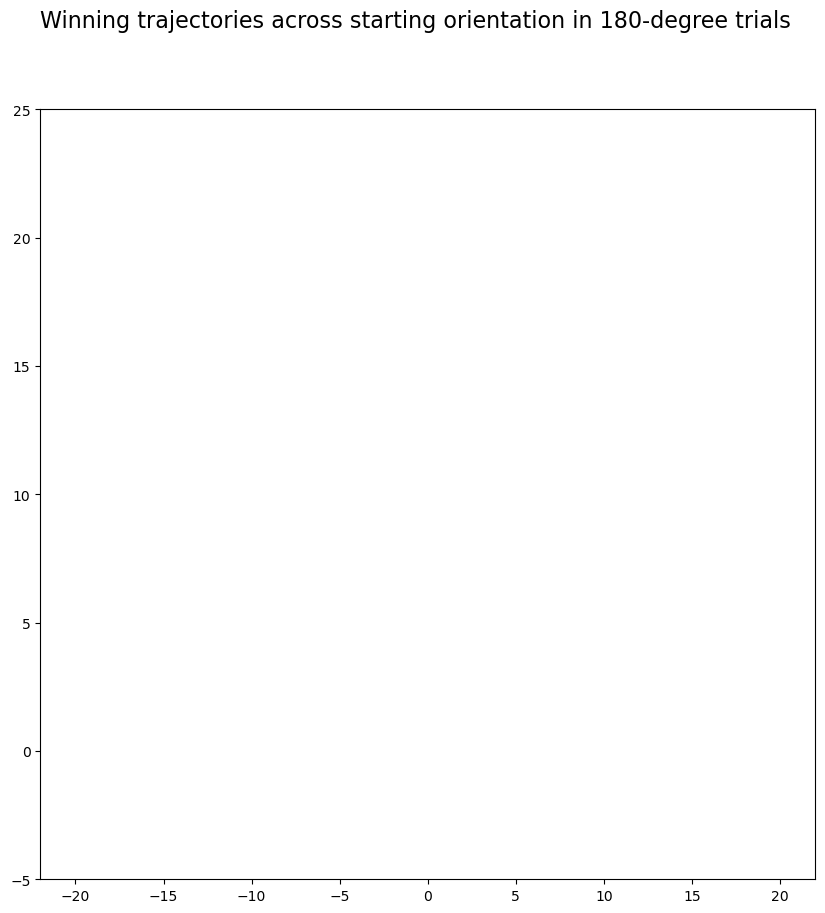

Animation saved as 180_degree_winning_trials.mp4


In [49]:
from matplotlib.animation import FFMpegWriter

import matplotlib.animation as animation

fig, ax = plt.subplots(figsize=(10,10))

# Fix axis limits to prevent plot from resizing during animation
ax.set_xlim(-22, 22)
ax.set_ylim(-5, 25)

# Add a title to the figure
fig.suptitle("Winning trajectories across starting orientation in 180-degree trials", fontsize=16)

def update(bin_idx):
    ax.clear()
    plot_octagon(ax)  # Do not reassign ax
    for trial in binned_trials_180[bin_idx]:
        plot_trajectory.plot_trial_winning_trajectory(ax, trial=trial, wall_specific_colours=True, linewidth=0.8, alpha=0.5)
    # Remove x and y axes, axis labels, and top/right spines
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    # Add a directional arrow closer to the plot center
    arrow_length = 4
    arrow_start_x = -16  # Moved closer to center
    arrow_start_y = 19
    arrow_angle = bin_idx * (2 * np.pi / 8)  # 0, 45, ..., 315 degrees in radians
    dx = arrow_length * np.sin(arrow_angle)
    dy = arrow_length * np.cos(arrow_angle)
    ax.arrow(arrow_start_x, arrow_start_y, dx, dy, head_width=0.7, head_length=1.2, fc='k', ec='k', linewidth=2, length_includes_head=True)
    # Keep axis limits fixed in every frame
    ax.set_xlim(-22, 22)
    ax.set_ylim(-25, 25)

ani = animation.FuncAnimation(fig, update, frames=8, interval=500, repeat=True)
plt.show()

# Save animation as MP4
writer = FFMpegWriter(fps=2, metadata=dict(artist='Me'), bitrate=1800)
ani.save('180_degree_winning_trials.mp4', writer=writer)
print('Animation saved as 180_degree_winning_trials.mp4')

### Checking

In [274]:
test_bin = binned_trials_90[3]
test_trial = test_bin[2]
player_id=0
trajectory = trajectory_vectors.extract_trial_player_trajectory(trial=test_trial, player_id=player_id)
head_angles = trajectory_vectors.extract_trial_player_headangles(trial=test_trial, player_id=player_id)
trial_player_headangles_smoothed = trajectory_headangle.get_smoothed_player_head_angle_vectors_for_trial(head_angles, window_size=5, debug=False)

-0.42207636910501295 -0.17397494139502664


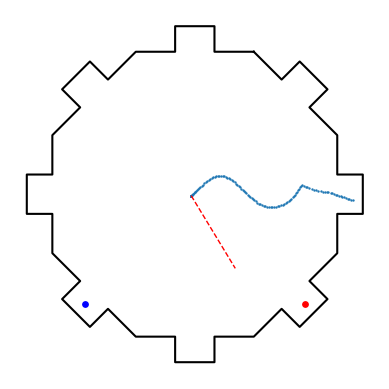

In [275]:
# example plotting head angle direction vector
start_index=0
x_start = trajectory[0,start_index]
y_start = trajectory[1,start_index]
x_gradient = trial_player_headangles_smoothed[0,start_index]
y_gradient = trial_player_headangles_smoothed[1,start_index]
vector_length = 10

start = [x_start, y_start]
print(x_start, y_start)
end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]

head_direction_vector_coordinates = np.array(list(zip(start,end)))

ax = plot_octagon()
ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)
ax.plot(head_direction_vector_coordinates[0,:], head_direction_vector_coordinates[1,:], c='r', linestyle='--', linewidth=1)

# plot Red and Blue dots to identify the High and Low walls respectively
walls = get_indices.get_walls(test_trial)
wall1_index = walls[0] - 1
wall2_index = walls[1] - 1
alcove_coordinates = return_alcove_centre_points()
plt.scatter(alcove_coordinates[0,wall1_index], alcove_coordinates[1,wall1_index], c='r', s=15)
plt.scatter(alcove_coordinates[0,wall2_index], alcove_coordinates[1,wall2_index], c='b', s=15)

for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()


/tmp/ipykernel_16921/454749812.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = cm.get_cmap('viridis', num_iterations)


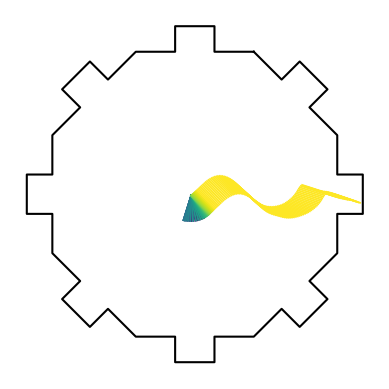

In [276]:
## Find the average head angle vector at all points throughout trajectory 
import matplotlib.cm as cm

ax = plot_octagon()
# ax.scatter(trajectory[0,:], trajectory[1,:], s=0.5)

num_iterations = len(range(0, trial_player_headangles_smoothed.shape[1], 3))
cmap = cm.get_cmap('viridis', num_iterations)


for idx, time_index in enumerate(range(0, trial_player_headangles_smoothed.shape[1]- 5,1)):
    x_start = trajectory[0,time_index]
    y_start = trajectory[1,time_index]
    x_gradient = trial_player_headangles_smoothed[0,time_index]
    y_gradient = trial_player_headangles_smoothed[1,time_index]
    vector_length = 3
    
    start = [x_start, y_start]
    end = [x_start + x_gradient*vector_length, y_start + y_gradient*vector_length]
    
    this_head_angle_vector_coordinates = np.array(list(zip(start,end)))

    x = this_head_angle_vector_coordinates[0,:]
    y = this_head_angle_vector_coordinates[1,:]
    colour = cmap(idx / (num_iterations - 1))
    ax.plot(x, y, color=colour, linewidth=1.3)

# plt.scatter(alcove_coordinates[0,wall1_index], alcove_coordinates[1,wall1_index], c='r', s=15)
# plt.scatter(alcove_coordinates[0,wall2_index], alcove_coordinates[1,wall2_index], c='b', s=15)


for spine in plt.gca().spines.values():
    spine.set_visible(False)
plt.gca().tick_params(left=False, bottom=False)  # Turn off major ticks
plt.gca().set_xticklabels([])
plt.gca().set_yticklabels([])
plt.show()

# c=np.arange(len(x)), cmap='viridis'